# Introduction
The most famous method for recognizing the quality of a classifier is the recognition of handwritten digits using the MNIST dataset. Preprocessing of images can dramatically improve classification accuracy, especially when the amount of data is limited.

In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        
from keras.datasets import mnist     
from keras.models import Sequential  
from keras.layers import Dense, Activation, Dropout, Reshape, Permute
from keras.utils import to_categorical

import scipy
from scipy import*
from scipy.fftpack import*
from scipy.fftpack import fft, ifft, fft2, fftshift
from skimage import filters
from scipy.fft import fft2, ifft2
from scipy.signal import coherence
import cv2


## Data Loading
The noisy data files was provided buy course stuff and the clean MNIST data was imported from (tf.keras.datasets). In addition to the data, a neural network classifier whom recognize the digits is probided from https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project.

In [2]:
# train_path = "D:\OneDrive - Technion\לימודים\סמסטר ז\עיבוד אותות\פרוייקט עיבוד אותות\Data\mnist_noisy_train.csv" 
train_path = "DATA\mnist_noisy_train.csv"
train = np.genfromtxt(train_path, delimiter=",")
y_train_ns = train[1:, -1]
X_train_ns = train[1:, :-1]
print("X_train_ns shape", X_train_ns.shape)
print("y_train_ns shape", y_train_ns.shape)

# test_path = "D:\OneDrive - Technion\לימודים\סמסטר ז\עיבוד אותות\פרוייקט עיבוד אותות\Data\mnist_noisy_test.csv"
test_path =  "DATA\mnist_noisy_test.csv"
test = np.genfromtxt(test_path, delimiter=",")
y_test_ns = test[1:, -1]
X_test_ns = test[1:, :-1]

X_train_ns = X_train_ns.astype('float32')   
X_test_ns = X_test_ns.astype('float32')
print("X_test_ns shape", X_test_ns.shape)
print("y_test_ns shape", y_test_ns.shape)
print(type(test))


(x_mnist, y_mnist), (x_mnist_test, y_mnist_test) = mnist.load_data()
x_mnist=x_mnist.astype('float32') / 255
x_mnist_test= x_mnist_test.astype('float32') / 255
print("x_mnist (train) shape", x_mnist.shape)
print("y_mnist (train) shape", y_mnist.shape)
print("x_mnist_test shape: ", x_mnist_test.shape)
print("y_mnist_test shape:", y_mnist_test.shape)

X_train_ns shape (60000, 784)
y_train_ns shape (60000,)
X_test_ns shape (10000, 784)
y_test_ns shape (10000,)
<class 'numpy.ndarray'>
x_mnist (train) shape (60000, 28, 28)
y_mnist (train) shape (60000,)
x_mnist_test shape:  (10000, 28, 28)
y_mnist_test shape: (10000,)


reshape to 28x28 matrix

In [3]:
X_train_mat = X_train_ns.reshape(60000, 28,28) 
X_test_mat = X_test_ns.reshape(10000, 28,28)

X_train_mat = X_train_mat.astype('float32')   
X_test_mat = X_test_mat.astype('float32')

#to move to the filter functions

print("Training matrix shape", X_train_mat.shape)
print("Testing matrix shape", X_test_mat.shape)

Training matrix shape (60000, 28, 28)
Testing matrix shape (10000, 28, 28)


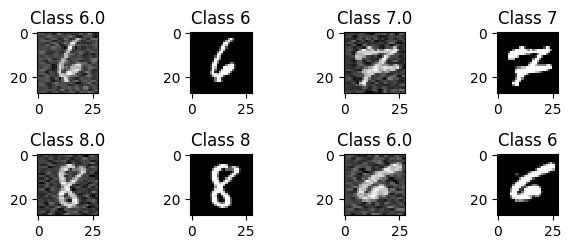

In [4]:
for i in range(4):
    plt.subplot(4,4,2*i+1)
    num = random.randint(0, len(X_train_mat))
    plt.imshow(X_train_mat[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train_ns[num]))
    plt.subplot(4,4,2*i+2)
    plt.imshow(x_mnist[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_mnist[num]))
    
plt.tight_layout()

## Preprocessing
The images come with artificially added noise introduced by the course team. For preprocessing, the noise distribution needs to be identified and mitigated as much as possible.
 

## Fourier Transform---> Freq Domain

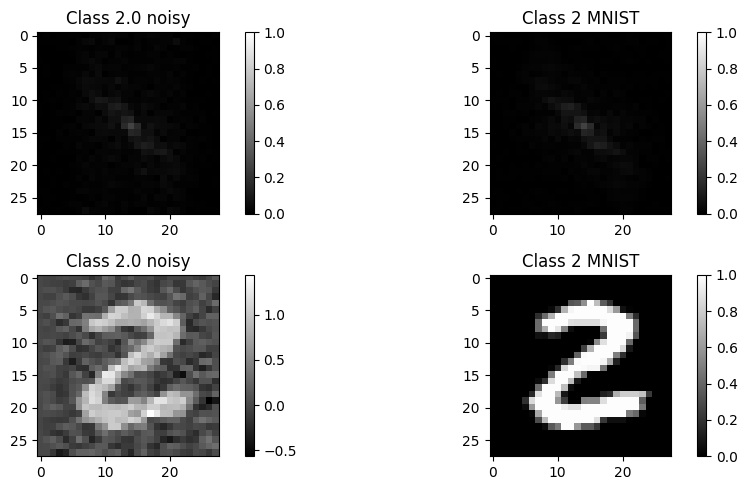

In [5]:
def normalized_magnitude(data):
    img = data
    fft_res = fft2(img)
    fft_res= fftshift(fft_res)
    magnitude = np.abs(fft_res)
    return (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min())

indx_mnist = 25
normalized_magnitude_mnist = normalized_magnitude(x_mnist)
indx_noisy = indx_mnist
normalized_magnitude_noisy_train = normalized_magnitude(X_train_mat)
normalized_magnitude_noisy_test = normalized_magnitude(X_test_mat)

plt.figure(figsize=(10, 5))  # Set the figure size to accommodate two subplots

# Plot the first subplot
plt.subplot(2, 2, 1)
plt.imshow(normalized_magnitude_noisy_train[indx_noisy], cmap='gray', vmin=normalized_magnitude_noisy_train.min(), vmax=normalized_magnitude_noisy_train.max())
plt.colorbar()
plt.title("Class {} noisy".format(y_train_ns[indx_noisy]))

# Plot the second subplot
plt.subplot(2, 2, 2)
plt.imshow(normalized_magnitude_mnist[indx_mnist], cmap='gray', vmin=normalized_magnitude_mnist.min(), vmax=normalized_magnitude_mnist.max())
plt.colorbar()
plt.title("Class {} MNIST".format(y_mnist[indx_mnist]))

plt.subplot(2, 2, 3)
plt.imshow(X_train_mat[indx_mnist], cmap='gray')
plt.colorbar()
plt.title("Class {} noisy".format(y_train_ns[indx_mnist]))
          
plt.subplot(2, 2, 4)
plt.imshow(x_mnist[indx_mnist], cmap='gray')
plt.colorbar()
plt.title("Class {} MNIST".format(y_mnist[indx_mnist]))  
                  
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Question 1: Identify Noise Distribution
Task: Select a few images, choose areas that do not contain digit lines, and plot the spectral density. \
Goal: What is the noise distribution you obtained?


# Black Areas Analysis: Noisy VS Clean MNIS


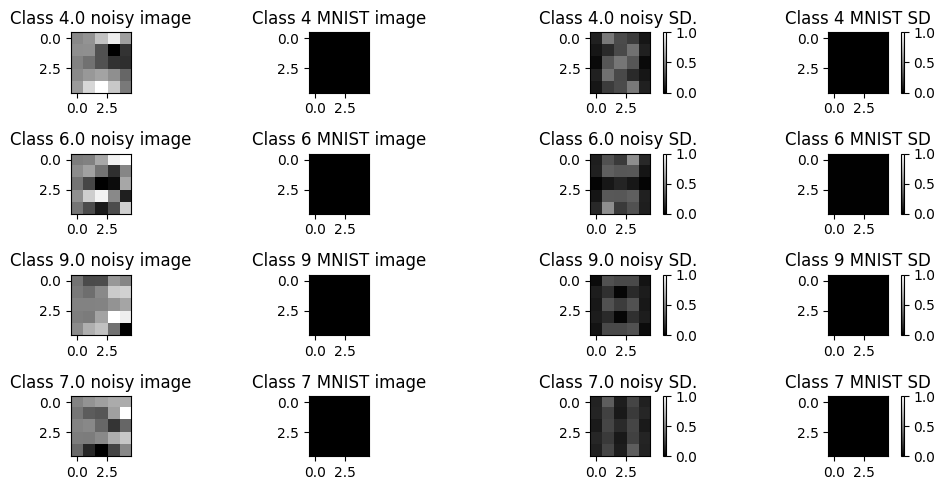

In [6]:
# Compute the normalized magnitude of the FFT for a subset (first 5x5 section) of the original MNIST data and noisy training data
normalized_magnitude_mnist_cut = normalized_magnitude(x_mnist[:, 0:5, 0:5])
normalized_magnitude_noisy_train_cut = normalized_magnitude(X_train_mat[:, 0:5, 0:5])

plt.figure(figsize=(10, 5))
no_exams = 4    # Define the number of examples to show
# Loop over the number of examples to display
for i in range(no_exams):
    # Create a subplot for the noisy image
    plt.subplot(4, 4, no_exams * i + 1)    
    num = random.randint(0, len(X_train_mat))    # Select a random index from the noisy training data
    plt.imshow(X_train_mat[num, 0:5, 0:5], cmap='gray', interpolation='none')    # Display the noisy training image
    plt.title("Class {} noisy image".format(y_train_ns[num]))
    
    # Create a subplot for the original MNIST image
    plt.subplot(4, 4, no_exams * i + 2)
    plt.imshow(x_mnist[num, 0:5, 0:5], cmap='gray', interpolation='none')    # Display the original MNIST image
    plt.title("Class {} MNIST image".format(y_mnist[num]))
    
    # Create a subplot for the spectral distribution (SD) of the noisy training image
    plt.subplot(4, 4, no_exams * i + 3)
    plt.imshow(normalized_magnitude_noisy_train_cut[num], cmap='gray', 
               vmin=normalized_magnitude_noisy_train_cut.min(), 
               vmax=normalized_magnitude_noisy_train_cut.max()) # Display the spectral distribution of the noisy training image
    plt.colorbar()    
    plt.title("Class {} noisy SD. ".format(y_train_ns[num]))
    
    # Create a subplot for the spectral distribution (SD) of the original MNIST image
    plt.subplot(4, 4, no_exams * i + 4)
    plt.imshow(normalized_magnitude_mnist_cut[num], cmap='gray', 
               vmin=normalized_magnitude_mnist_cut.min(), 
               vmax=normalized_magnitude_mnist_cut.max())   # Display the spectral distribution of the original MNIST image
    plt.colorbar()
    plt.title("Class {} MNIST SD".format(y_mnist[num]))


plt.tight_layout()  # Adjust the layout to ensure plots are nicely spaced
plt.show()

## Data Processing


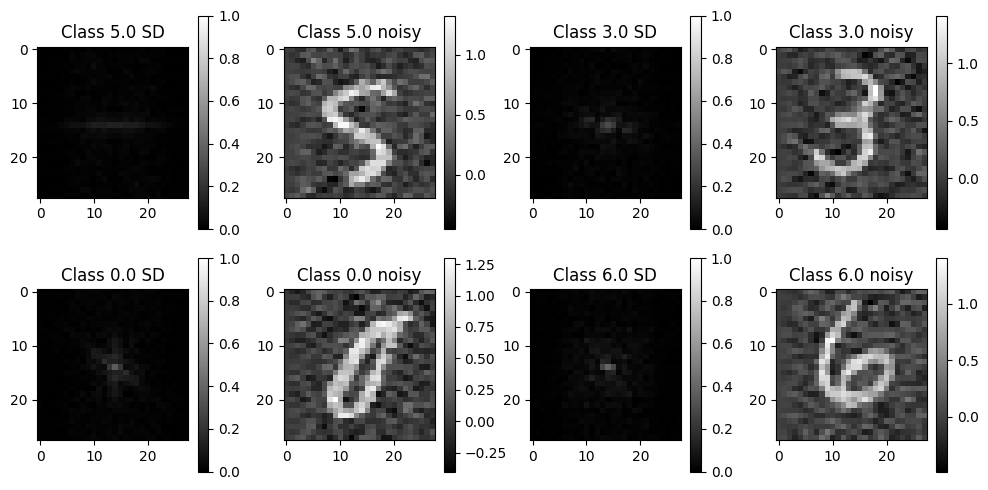

In [7]:
plt.figure(figsize=(10, 5))
for i in range(4):
    # Create a subplot for the noisy image
    plt.subplot(2, 4, 2*i+1 )    
    num = random.randint(0, len(X_train_mat))    # Select a random index from the noisy training data
    plt.imshow(normalized_magnitude_noisy_train[num], cmap='gray', vmin=normalized_magnitude_noisy_train.min(), vmax=normalized_magnitude_noisy_train.max())
    plt.colorbar()
    plt.title("Class {} SD".format(y_train_ns[num]))
    
    # Create a subplot for the spectral distribution (SD) of the noisy training image
    plt.subplot(2, 4, 2*i + 2)
    plt.imshow(X_train_mat[num], cmap='gray')
    plt.colorbar()
    plt.title("Class {} noisy".format(y_train_ns[num]))
    
plt.tight_layout()  # Adjust the layout to ensure plots are nicely spaced
plt.show()

# Question 1: Average Images and Cross-Correlation
Task: Average the images of identical digits. Can you see the differences between different digits? Is it possible to identify the digit using cross-correlation between the average image and the original digit? Test this.

6742
0.0


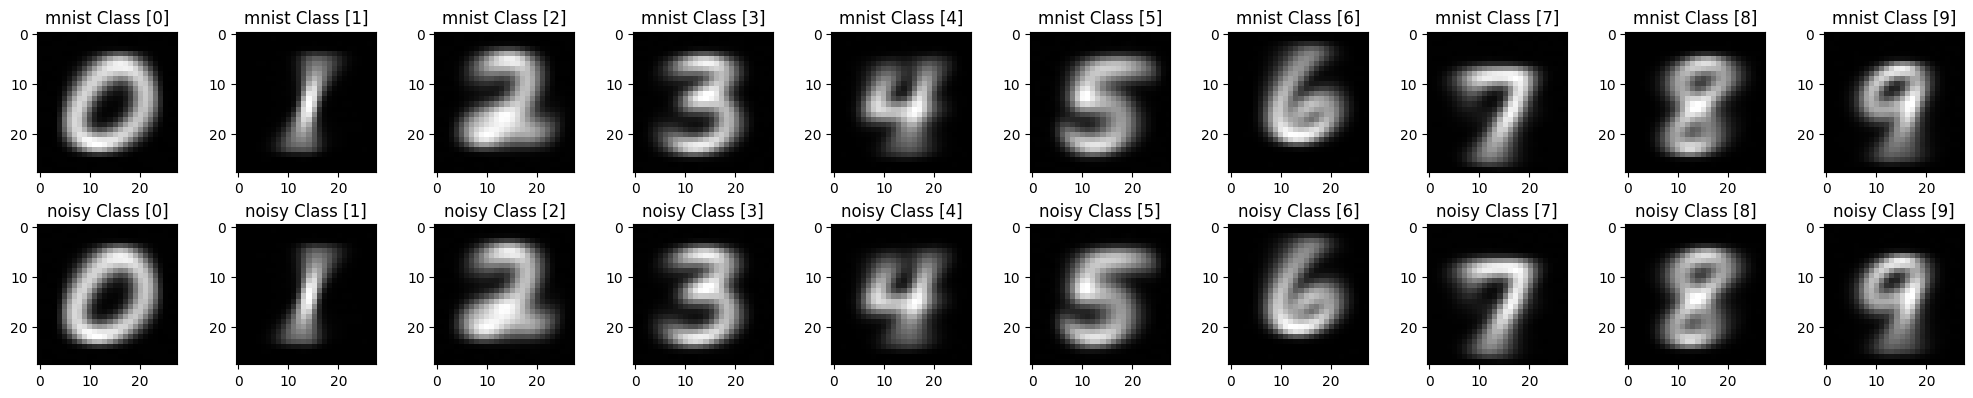

In [8]:
mnist_classes=mnist_avg=noisy_classes=noisy_avg=np.zeros((10, 28,28))
for i in range(59999):
    noisy_classes[int(y_train_ns[i])] = noisy_classes[int(y_train_ns[i])] + X_train_mat[i]
    mnist_classes[int(y_mnist[i])] = mnist_classes[int(y_mnist[i])] + x_mnist[i]
    if i <= 9999:
        noisy_classes[int(y_test_ns[i])] = noisy_classes[int(y_test_ns[i])] + X_test_mat[i]
        mnist_classes[int(y_mnist_test[i])] = mnist_classes[int(y_mnist_test[i])] + x_mnist_test[i]
print(np.sum(y_train_ns.astype('float32') == 1))
for j in range(10):
    noisy_avg[j] = noisy_classes[j]/ (np.sum(y_train_ns.astype('float32') == j) + np.sum(y_test_ns.astype('float32') == j))
    mnist_avg[j] = mnist_classes[j]/ (np.sum(y_mnist_test.astype('float32') == j) + np.sum(y_mnist.astype('float32') == j))
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist_avg[i], cmap='gray', interpolation='none')
    plt.title("mnist Class {}".format([i]))
    plt.subplot(2,10,i+11)
    plt.imshow(noisy_avg[i], cmap='gray', interpolation='none')
    plt.title("noisy Class {}".format([i]))
plt.tight_layout()

loss=mnist_avg-noisy_avg
print(loss.max())



# Averaging- Coherence

score for class 0 is 0.23315452068745637
score for class 1 is 0.2377698848212742
score for class 2 is 0.24819797701634683
score for class 3 is 0.18373767958976092
score for class 4 is 0.24477873771245914
score for class 5 is 0.2490391993257692
score for class 6 is 0.2260593885016588
score for class 7 is 0.3555377701665656
score for class 8 is 0.22029756521624777
score for class 9 is 0.2921833883746989
max score is for class: 7
real class is: 7.0
score for class 0 is 0.233955537254788
score for class 1 is 0.255233868751421
score for class 2 is 0.23275707171568796
score for class 3 is 0.2334532605245259
score for class 4 is 0.212256707495502
score for class 5 is 0.23661601168412344
score for class 6 is 0.22939132143706692
score for class 7 is 0.22306047092027625
score for class 8 is 0.2181535966490452
score for class 9 is 0.2521206121140078
max score is for class: 1
real class is: 2.0
score for class 0 is 0.2263578728300737
score for class 1 is 0.2439749343133755
score for class 2 is 0.1

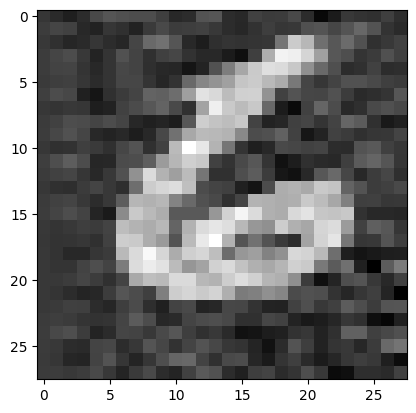

In [9]:
def compute_score(im1,im2):
    frequencies, coherence_values = coherence(im1.reshape(784,),im2.reshape(784,))
    return sum(coherence_values)/len(coherence_values)

count_correct=0
N= len(y_test_ns)
for test_index in range(N):
    scores=np.zeros(10)
    for i in range(0,10):
        scores[i] = compute_score(noisy_avg[i],X_test_mat[test_index])
        print(f"score for class {i} is {scores[i]}")
    detected_class = np.argmax(scores)
    print('max score is for class:', detected_class)
    print('real class is:', y_test_ns[test_index])
    plt.imshow(X_test_mat[test_index], cmap='gray', interpolation='none')
    count_correct += ( detected_class==y_test_ns[test_index])
print(N)
print(f"accuracy on full test set is {count_correct/N}")

TRESH HOLDER DEFINE


Text(0.5, 1.0, 'Denoised Image')

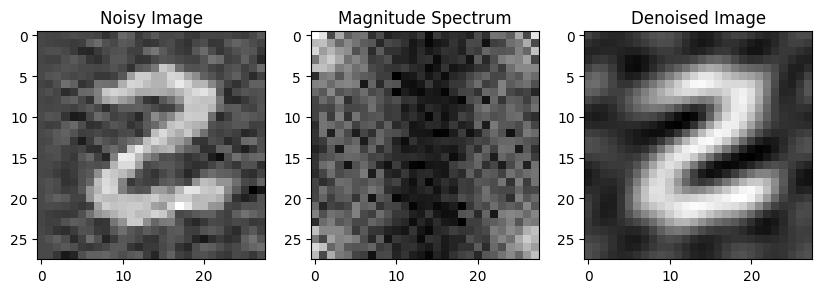

In [10]:
threshold_const = 15
def TreshHolder(threshold_const, x):
    fft_result= fft2(x)
    
    magnitude_spectrum = np.abs(fft_result)
    denoised_fft = fft_result * (magnitude_spectrum > threshold_const)
    #denoised_magnitude = np.abs(denoised_fft)
    denoised_image = np.real(ifft2(denoised_fft))
    return magnitude_spectrum,denoised_image
# Compute the 2D FFT of the noisy image
img_th = X_train_mat[indx_noisy]
ms_th, di_th = TreshHolder(threshold_const, img_th)
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_th, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(ms_th + 1), cmap='gray')
plt.title('Magnitude Spectrum')

plt.subplot(1, 3, 3)
plt.imshow(di_th, cmap='gray')
plt.title('Denoised Image')

# Question 2: Noise Reduction Using Filters
Task: Try to reduce noise using an appropriate filter. Did the CNN classifier results improve?
 \


# Gaussian Blurring
Note: you can configurate ksize and sigma as you desire.

(60000, 28, 28)
(10000, 28, 28)


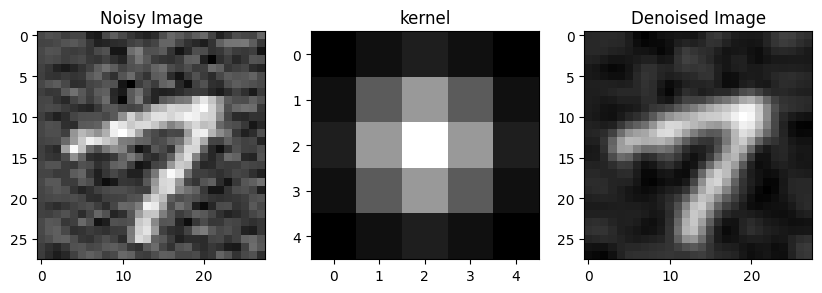

(60000, 28, 28)
(10000, 28, 28)


In [11]:
indx_noisy = 101
ksize = 5 # kerenel size (must be odd)              can be reconfiquered
sigma = 1 # kernel sigma                            can be reconfiquered
kernel_1d = cv2.getGaussianKernel( ksize ,sigma)
kernel = kernel_1d*kernel_1d.T
denoised_image = np.zeros((len(X_train_mat)+len(y_test_ns),28,28))

for i, img in enumerate(np.concatenate((X_train_mat, X_test_mat), axis=0)):
    denoised_image[i] = cv2.GaussianBlur(img, (ksize,ksize), sigma)
    
X_filtered_train = denoised_image[:60000,:,:]
X_filtered_test = denoised_image[60000:,:,:]
print(X_filtered_train.shape)
print(X_filtered_test.shape)

# Plot the original and denoised images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_train_mat[indx_noisy], cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(kernel, cmap='gray')
plt.title('kernel')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image[indx_noisy], cmap='gray')
plt.title('Denoised Image')

plt.show()

X_filtered_train = denoised_image[:60000,:,:]
X_filtered_test = denoised_image[60000:,:,:]
print(X_filtered_train.shape)
print(X_filtered_test.shape)


# Define Model Training 
CNN model configuration inspired by https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project

In [12]:
def Model(Xtrain , Xtest , Ytrain , Ytest):
    no_classes = 10
    Y_train = to_categorical(Ytrain, no_classes)   #**********
    Y_test = to_categorical(Ytest, no_classes)    #**********
    model = Sequential()
    model.add(Dense(512, input_shape=(784,))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(Xtrain, Y_train, batch_size=128, epochs=10, verbose=1)     #**********
    score = model.evaluate(Xtest, Y_test)  #**********
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.subplot(2,1,2)
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.tight_layout()
    results = model.predict(Xtest)   #**********
    results = np.argmax(results,axis = 1)
    results = pd.Series(results,name="Label")
    submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
    submission.to_csv("submission.csv",index=False)
    predicted_classes = np.argmax(model.predict(Xtest), axis=-1)
    correct_indices = np.nonzero(predicted_classes == Ytest)[0]
    incorrect_indices = np.nonzero(predicted_classes != Ytest)[0]
    plt.figure()
    for i, correct in enumerate(correct_indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(Xtest[correct].reshape(28,28), cmap='gray', interpolation='none')   #**********
        plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Ytest[correct])) #**********
    plt.tight_layout()
    plt.figure()
    for i, incorrect in enumerate(incorrect_indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(Xtest[incorrect].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Ytest[incorrect]))
    plt.tight_layout()
    return score , history


# Clean MNIST model accuracy
Training the model with MNIST train data and testing the accurecy on MNIST test data

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


c:\Users\yaniv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8644 - loss: 0.4534
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9699 - loss: 0.1019
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9767 - loss: 0.0731
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9828 - loss: 0.0523
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9860 - loss: 0.0443
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9885 - loss: 0.0360
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9894 - loss: 0.0319
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9902 - loss: 0.0305
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9920 - loss: 0.0265
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9918 - loss: 0.0248
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.1006
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━

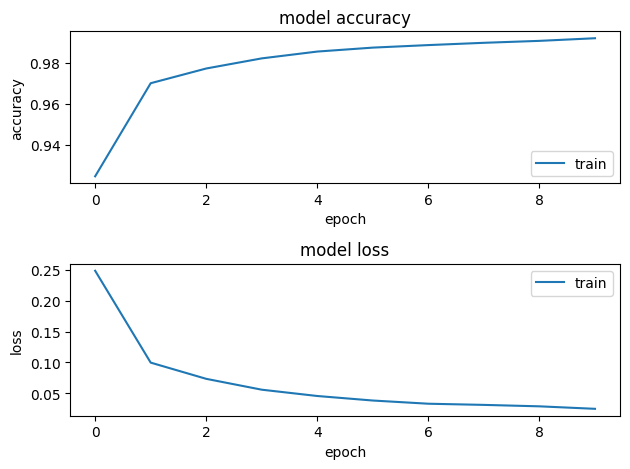

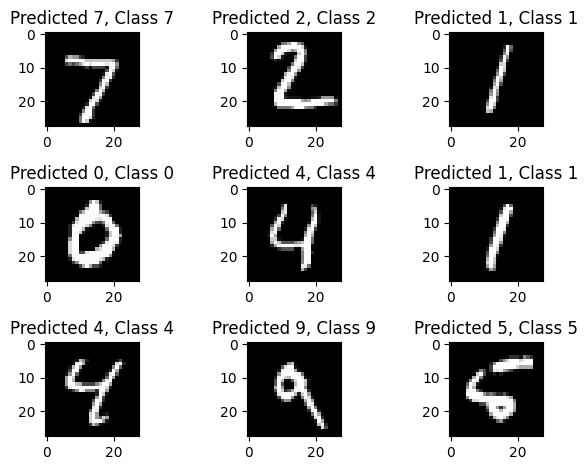

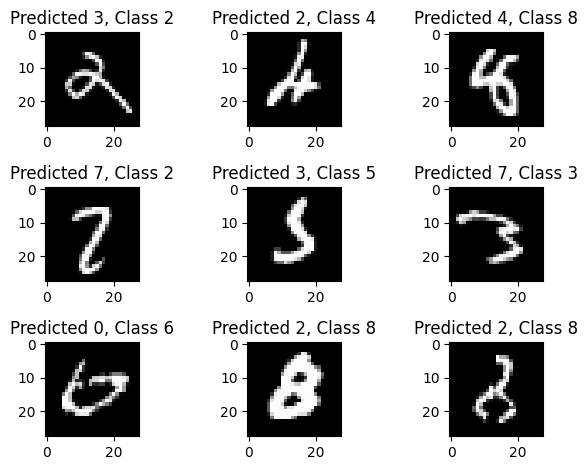

In [13]:
X_train_MNIST784 = x_mnist.reshape(60000, 784) 
X_test_MNIST784 = x_mnist_test.reshape(10000, 784)   

X_train_MNIST784 = X_train_MNIST784.astype('float32')
X_test_MNIST784 = X_test_MNIST784.astype('float32')


print("Training matrix shape", X_train_MNIST784.shape)
print("Testing matrix shape", X_test_MNIST784.shape)
score_MNIST, history_MNIST = Model(X_train_MNIST784, X_test_MNIST784 , y_mnist , y_mnist_test)
print('Test accuracy MNIST:', score_MNIST[1])

# Noisy MNIST model accuracy
Training the model with MNIST train data and testing the accurecy on MNIST test dataNoisy model accuracy

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8466 - loss: 0.4970
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9656 - loss: 0.1101
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9789 - loss: 0.0655
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9860 - loss: 0.0434
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9897 - loss: 0.0314
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9915 - loss: 0.0266
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9920 - loss: 0.0247
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9926 - loss: 0.0223
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9935 - loss: 0.0194
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9926 - loss: 0.0201
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1652
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━

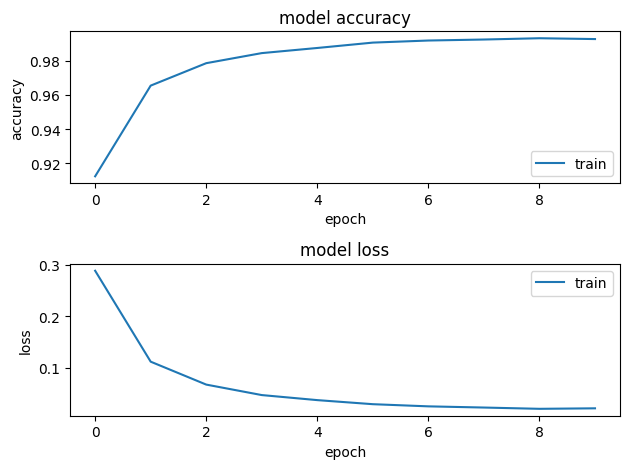

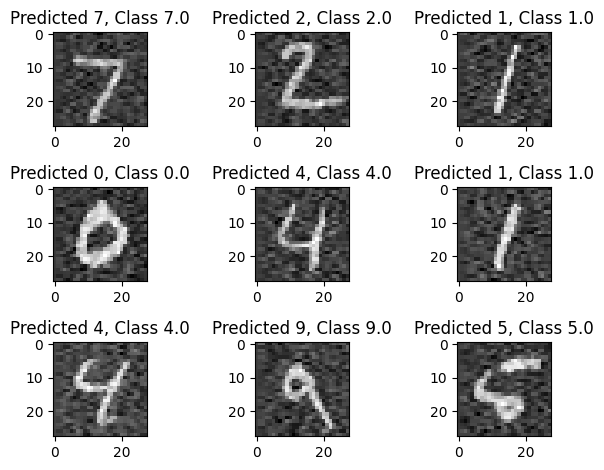

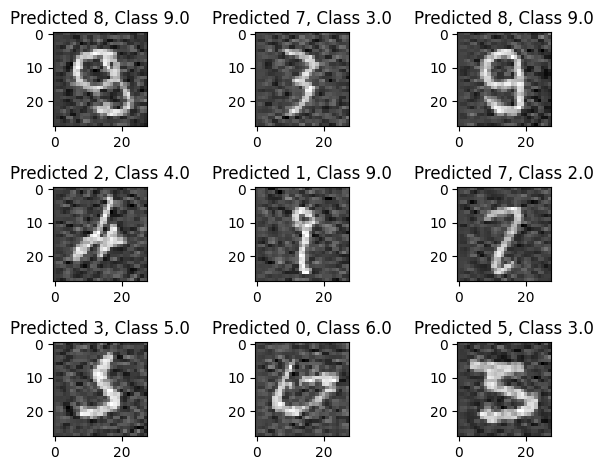

In [14]:
print("Training matrix shape", X_train_ns.shape)
print("Testing matrix shape", X_test_ns.shape)
score_noicy, history_noicy = Model(X_train_ns, X_test_ns , y_train_ns , y_test_ns)
print('Test accuracy noicy:', score_noicy[1])

# Denoised MNIST with Gaussian Filter Model Accuracy
Training the model with filtered data (gaussian).

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8561 - loss: 0.4797
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9589 - loss: 0.1354
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9670 - loss: 0.1016
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9737 - loss: 0.0819
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9781 - loss: 0.0686
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9799 - loss: 0.0589
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9821 - loss: 0.0527
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9841 - loss: 0.0467
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9866 - loss: 0.0403
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9874 - loss: 0.0371
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0992
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━

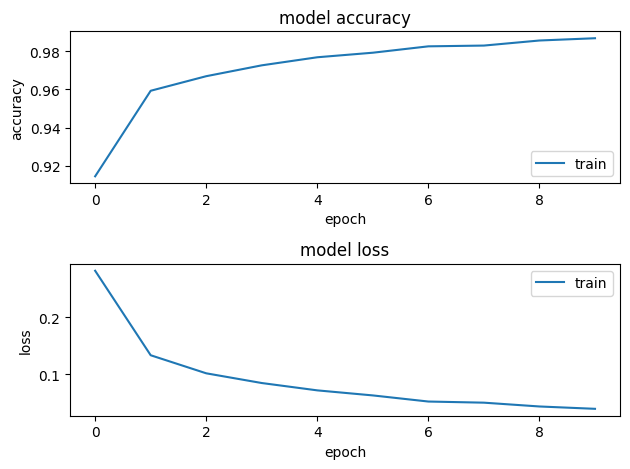

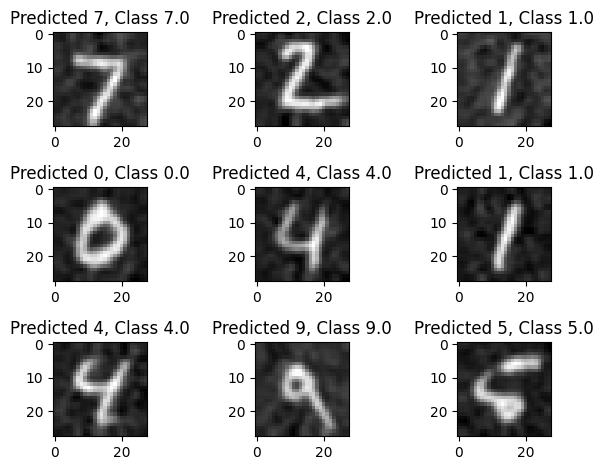

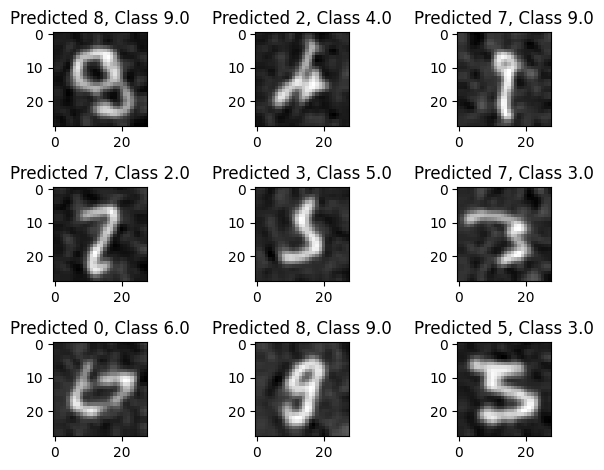

In [15]:
X_train_filtered = X_filtered_train.reshape(60000, 784) 
X_test_filtered = X_filtered_test.reshape(10000, 784)   

X_train_filtered = X_train_filtered.astype('float32')   
X_test_filtered = X_test_filtered.astype('float32')


print("Training matrix shape", X_train_filtered.shape)
print("Testing matrix shape", X_test_filtered.shape)
score_filtered, history_filtered = Model(X_train_filtered, X_test_filtered , y_train_ns , y_test_ns)
print('Test accuracy MNIST:', score_filtered[1]) #WHY??? 

# Denoised MNIST with Tresholdertr Filter Model Accuracy
Training the model with filtered data (Treshold).

TreshHold model accuracy

(60000, 784) (10000, 784)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8468 - loss: 0.5024
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9663 - loss: 0.1119
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9802 - loss: 0.0624
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9857 - loss: 0.0449
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9895 - loss: 0.0316
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9905 - loss: 0.0280
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0236
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9928 - loss: 0.0218
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9936 - loss: 0.0185
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9943 - loss: 0.0172
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1591
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━

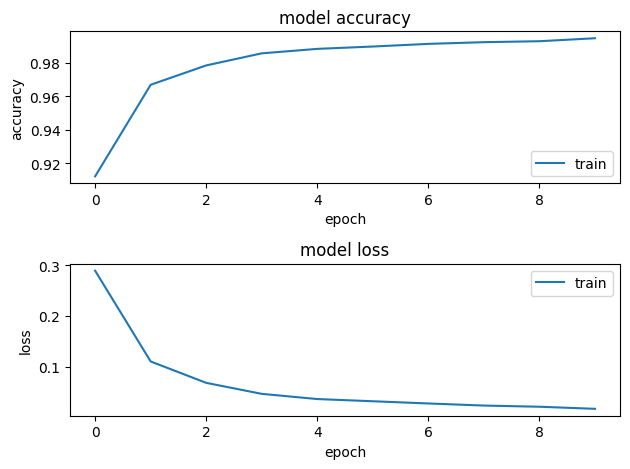

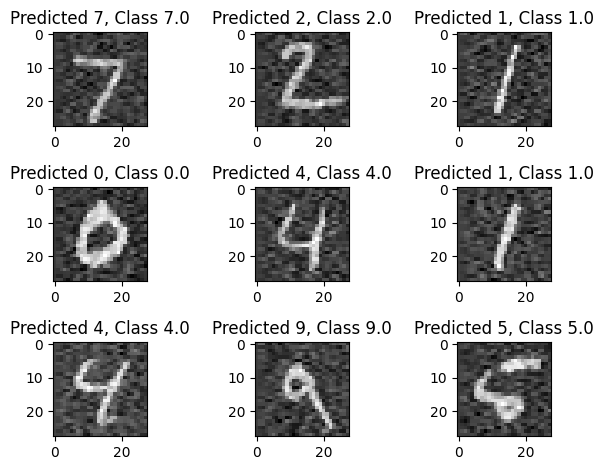

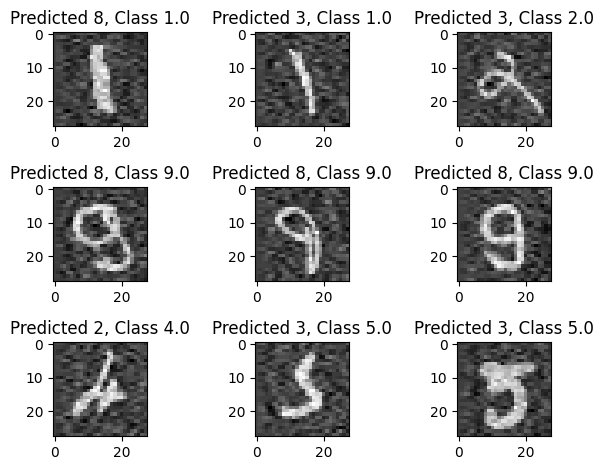

In [16]:
threshold=15
X_train_TH = TreshHolder(threshold,X_train_ns)[1].reshape(60000, 784)     #**********
y_train_TH = y_train_ns   #**********
X_test_TH = TreshHolder(threshold,X_test_ns)[1].reshape(10000, 784)        #**********
y_test_TH = y_test_ns    #**********
print(X_train_TH.shape , X_test_TH.shape)
score_TreshHold, history_TreshHold = Model(X_train_TH, X_test_TH , y_train_TH , y_test_TH)
print('Test accuracy TreshHold:', score_TreshHold[1])
#plots(X_train_TH, X_test_TH , y_train_ns , y_test_ns, history_TreshHold)

# Comparing between the training method accuracy

In [17]:
print('Test accuracy MNIST:', score_MNIST[1])
print('Test accuracy noicy:', score_noicy[1])
print('Test accuracy filtered:', score_filtered[1])
print('Test accuracy TreshHold:', score_TreshHold[1])



Test accuracy MNIST: 0.9818000197410583
Test accuracy noicy: 0.9724000096321106
Test accuracy filtered: 0.977400004863739
Test accuracy TreshHold: 0.9714999794960022


(60000, 28, 28)
(10000, 28, 28)


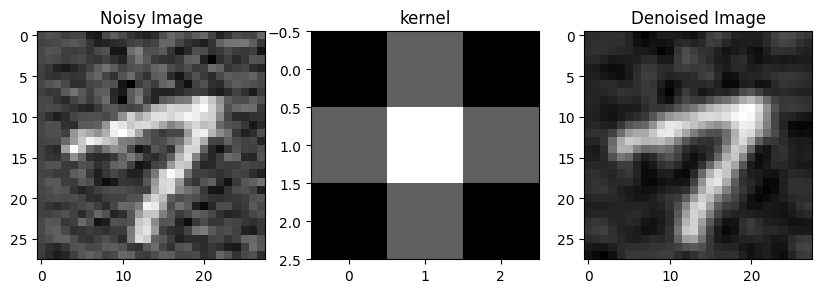

(60000, 28, 28)
(10000, 28, 28)


In [18]:
indx_noisy = 101
ksize = 3 # kerenel size (must be odd)              can be reconfiquered
sigma = 1 # kernel sigma                            can be reconfiquered
kernel_1d = cv2.getGaussianKernel( ksize ,sigma)
kernel = kernel_1d*kernel_1d.T
denoised_image = np.zeros((len(X_train_mat)+len(y_test_ns),28,28))

for i, img in enumerate(np.concatenate((X_train_mat, X_test_mat), axis=0)):
    denoised_image[i] = cv2.GaussianBlur(img, (ksize,ksize), sigma)
    
X_filtered_train = denoised_image[:60000,:,:]
X_filtered_test = denoised_image[60000:,:,:]
print(X_filtered_train.shape)
print(X_filtered_test.shape)

# Plot the original and denoised images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_train_mat[indx_noisy], cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(kernel, cmap='gray')
plt.title('kernel')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image[indx_noisy], cmap='gray')
plt.title('Denoised Image')

plt.show()

X_filtered_train = denoised_image[:60000,:,:]
X_filtered_test = denoised_image[60000:,:,:]
print(X_filtered_train.shape)
print(X_filtered_test.shape)